## Inteligência Artificial 2024.1 : Prova N1 - 2o Bimestre 

### Nome: André Cini

### RA: 081200039

## Importação das Bibliotecas :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

## Base de dados :

In [2]:
dados = pd.read_excel('Base_N1_B2_2024.1.xlsx')

print(dados)

     Feature1  Feature2 Label
0    0.000000  0.000000  Blue
1    0.000125  0.002497  Blue
2    0.000499  0.004975  Blue
3    0.001121  0.007416  Blue
4    0.001987  0.009801  Blue
..        ...       ...   ...
435  0.521374  0.130673   Red
436  0.529706  0.104938   Red
437  0.536762  0.078695   Red
438  0.542513  0.052009   Red
439  0.546932  0.024943   Red

[440 rows x 3 columns]


In [3]:
dados['Label'] = dados['Label'].map({
    'Blue': 0, 
    'Red': 1})
print(dados)

     Feature1  Feature2  Label
0    0.000000  0.000000      0
1    0.000125  0.002497      0
2    0.000499  0.004975      0
3    0.001121  0.007416      0
4    0.001987  0.009801      0
..        ...       ...    ...
435  0.521374  0.130673      1
436  0.529706  0.104938      1
437  0.536762  0.078695      1
438  0.542513  0.052009      1
439  0.546932  0.024943      1

[440 rows x 3 columns]


### Análise Visual dos Dados:

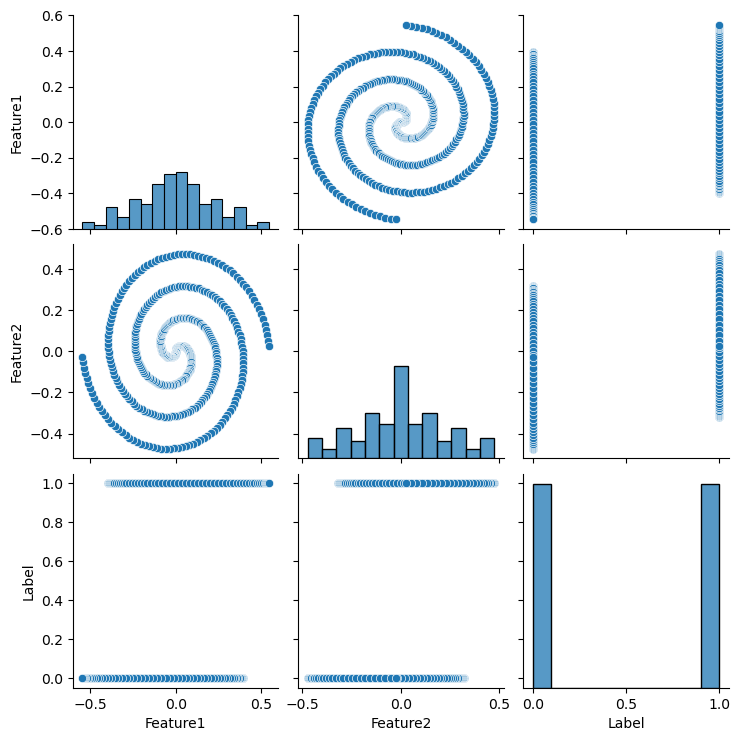

In [4]:
sns.pairplot(dados)

<Axes: xlabel='Feature1', ylabel='Feature2'>

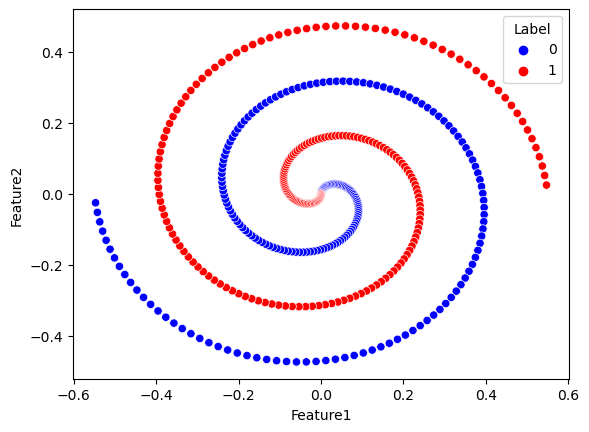

In [5]:
palette =  {'Red', 'Blue'}

sns.scatterplot(x="Feature1", y="Feature2", hue="Label", palette=palette, data=dados)

### Separação da Base em treinamento e teste:

In [6]:
x = dados.drop('Label',axis=1).values
y = dados['Label'].values

x_treino, x_teste, y_treino, y_teste = train_test_split(
    x, 
    y, 
    test_size=0.25, 
    random_state=1, 
    stratify=y, 
    shuffle=True)

print("x_treino:")
print(x_treino.shape)
print("x_teste:")
print(x_teste.shape)

print("y_treino:")
print(y_treino.shape)
print("y_treino:")
print(y_teste.shape)

x_treino:
(330, 2)
x_teste:
(110, 2)
y_treino:
(330,)
y_treino:
(110,)


### Normalização das Features:

In [7]:
scaler = MinMaxScaler()
scaler.fit(x_treino)

x_treino = scaler.transform(x_treino)
x_teste = scaler.transform(x_teste)

print("x_treino:")
print(x_treino.shape)
print("x_teste:")
print(x_teste.shape)

x_treino:
(330, 2)
x_teste:
(110, 2)


## Desenvolvimento do classificador utilizando Rede Neural Artificial :

In [8]:
model = Sequential()

model.add(Dense(units=10,activation='tanh'))
model.add(Dense(units=20,activation='tanh'))
model.add(Dense(units=10,activation='tanh'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
# O callback não foi utilizado, pois devido ao ajuste regular tanto nos dados teste quanto na de treino

# early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 100) 

In [10]:
# Adicionar o callback ao método fit se necessário
model.fit(
    x_treino, 
    y_treino, 
    epochs=3500, 
    batch_size=20, 
    validation_data=(x_teste, y_teste), 
    verbose=1)

Epoch 1/3500
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4767 - loss: 0.6938 - val_accuracy: 0.5182 - val_loss: 0.6902
Epoch 2/3500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5391 - loss: 0.6860 - val_accuracy: 0.5364 - val_loss: 0.6861
Epoch 3/3500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5674 - loss: 0.6737 - val_accuracy: 0.5636 - val_loss: 0.6840
Epoch 4/3500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5850 - loss: 0.6716 - val_accuracy: 0.5909 - val_loss: 0.6806
Epoch 5/3500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6254 - loss: 0.6702 - val_accuracy: 0.5909 - val_loss: 0.6811
Epoch 6/3500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6303 - loss: 0.6538 - val_accuracy: 0.5909 - val_loss: 0.6822
Epoch 7/3500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6231 - loss: 0.6589 - val_accuracy: 0.5909 - val_loss: 0.6808
Epoch 8/3500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5741 - loss: 0.6720 - val_accuracy: 0

### Validações:

In [11]:
model.history.history

{'accuracy': [0.5,
  0.5575757622718811,
  0.539393961429596,
  0.6000000238418579,
  0.596969723701477,
  0.5878787636756897,
  0.5909090638160706,
  0.5848484635353088,
  0.5848484635353088,
  0.6060606241226196,
  0.6090909242630005,
  0.6090909242630005,
  0.6212121248245239,
  0.6090909242630005,
  0.6181818246841431,
  0.6090909242630005,
  0.6303030252456665,
  0.6272727251052856,
  0.6121212244033813,
  0.6151515245437622,
  0.6030303239822388,
  0.6212121248245239,
  0.596969723701477,
  0.6030303239822388,
  0.6060606241226196,
  0.6151515245437622,
  0.6151515245437622,
  0.6181818246841431,
  0.6151515245437622,
  0.5878787636756897,
  0.6242424249649048,
  0.6151515245437622,
  0.6151515245437622,
  0.6242424249649048,
  0.6151515245437622,
  0.6303030252456665,
  0.6090909242630005,
  0.596969723701477,
  0.6090909242630005,
  0.6393939256668091,
  0.5909090638160706,
  0.6060606241226196,
  0.6181818246841431,
  0.6181818246841431,
  0.6151515245437622,
  0.6242424249649

<Axes: >

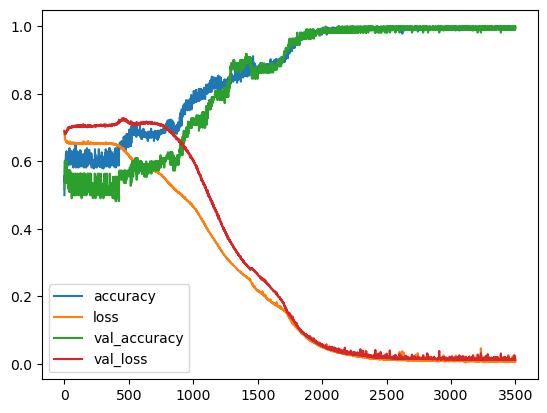

In [12]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [13]:
predictions = (model.predict(x_teste) > 0.5).astype("int32")
print(classification_report(y_teste, predictions))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        55

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110



In [14]:
print(confusion_matrix(y_teste, predictions))

[[55  0]
 [ 0 55]]


## Diagrama da rede neural e parâmetros :

### Diagrama da Rede Neural desenvolvida:
![diagrama_rna.drawio.png](diagrama_rna.drawio.png)

### Estrutura da Rede Neural
- Camada de Entrada (Input Layer): 2 nós (sem viéses)
- Camada Oculta (Hidden Layer):
    - Subcamada 1: 10 nós + viéses
    - Subcamada 2: 20 nós + viéses
    - Subcamda 3: 10 nós + viéses
- Camada de Saída (Output Layer): 1 nó + viés

### Cálculo de Parâmetros:

#### Camada de Entrada
- Camada de entrada: 2 nós

**Cálculo:**
> total_entrada = 0 parâmetros

#### Camada Oculta
- Subcamada 1: 10 nós conectados a 2 nós da camada anterior (entrada), mais 10 viéses.
- Subcamada 2: 20 nós conectados a 10 nós da camada anterior, mais 20 viéses.
- Subcamada 3: 10 nós conectados a 20 nós da camada anterior, mais 10 viéses.

**Cálculo:**
> total_oculta = (2.10 + 10) + (10.20 + 20) + (20.10 + 10)  
> total_oculta = 30 + 220 + 210  
> total_oculta = 460 parâmetros

#### Camada de Saída
- Camada de saída:  nó conectado a 10 nós da última camada oculta, mais 1 viés.

**Cálculo:**
> total_saida = 10.1 + 1    
> total_saida = 10 + 1  
> total_saida = 11 parâmetros   

#### Resultado:
> total = total_entrada + total_oculta + total_saida    
> total = 0 + 460 + 11  
> total = 471 parâmetros  

Ou seja, no total, a Rede Neural Artificial desenvolvida conta com **473 parâmetros**. 

Obs.: Via código, pode-se utilizar o método ```summary()```, porém, como padrão ele não conta com os parâmetros da Camada de Entrada (pelo fato de não possuírem viéses explícitos), ou seja, ele possuí 2 parâmetros a menos que o cálculo realizado manualmente. Além disso, ele fornece uma série de cálculos de parâmetros a mais do que o cálculo manual feito. Veja no código a seguir:

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,415 (5.53 KB)

 Trainable params: 471 (1.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 944 (3.69 KB)

## Justificativa sobre a precisão da rede neural e pontos de atenção :

### Análise da Base de Dados
Ao fazer a análise do gráfico da Base de Dados, foi notado que os dados seguem um **Formato de Espiral**. Devido a isso, como ativação, foi utilizado a função de ativação **Tangente Hiperbólica (tanh)** pelo fato de ser mais adequada a dados altamente não lineares.

Além disso, na etapa de seração da base de dados em Treino e Teste, foi utilizado os parâmetros **Stratify** para garantir uma **maior fidelidade em relação a proporção de cada Feature**, ou seja, tanto os dados de teste, quanto os dados de treino, seguem a mesma proporção das Features 1 e 2. Por Exemplo: Se a base de dados utilizada possui uma proporção de 60% da Feature 1 e 40% da Feature dois, utilizando o Stratify teremos a mesma proporção nos dados de teste e treino.

### Overfitting
O Modelo criado, passou por vários testes até chegar na versão atual. Foi notado que com a Rede Neural Artificial criada, era necessário uma grande quantidade de épocas para chegar em uma precisão de mais de 99%. Além disso, ao análisar o Gráfico de Erro ao longo das Épocas, percebe-se uma instabilidade em alguns períodos, no qual eles deixavam de variar. Devido a isso, não foi utilizado o Callback, pois o modelo correria o risco de parar de iterar as épocas. 

Além disso, A alta precisão tanto no conjunto de treinamento quanto no conjunto de validação indica que o modelo não está apenas memorizando os dados de treinamento, mas também está generalizando bem para dados não vistos. Isso sugere que o modelo não está sofrendo de overfitting, onde ele se ajusta excessivamente aos dados de treinamento e falha em generalizar para novos dados. Veja a seguir os resultados:
- Acurácia de Treinamento: 0.9984
- Acurácia de Teste: 0.9909

### Métricas
Na etapa de validação do modelo, foi possível identificar alguns pontos:
1. **Baixa Perda:** A baixa perda tanto no conjunto de treinamento (loss: 0.0049), quanto no conjunto de validação (val_loss: 0.0180) sugerem que o modelo está fazendo previsões precisas com base nos dados de entrada. Isso significa que o modelo está trabalhando para tornar suas previsões o mais próximas possível dos resultados reais, o que é um indicador de boa qualidade do modelo.
2. **Alta Precisão:** A acurácia tando no conjunto de treinamento (accuracy: 0.98984), quanto no conjunto de validação (val_accuracy: 0.9909) mostram que a Taxa de Acerto e relativamente alta, já que o modelo acerta mais de 99% das vezes.
3. **Alta precisão na classe 0 (negativa):** Com 55 verdadeiros negativos (TN) e nenhum falso positivo (FP), podemos ver que o modelo está prever corretamente a grande maioria das instâncias da classe 0.
4. **Alta precisão na classe 1 (positiva):** Com 54 verdadeiros positivos (TP) e apenas 1 falso negativo (FN), o modelo também está prever corretamente a maioria das instâncias da classe 1, embora haja um caso onde uma instância da classe 1 foi classificada erroneamente como classe 0.
5. **Baixo número de erros:** O fato de haver apenas um falso negativo (FN) e nenhum falso positivo (FP) sugere que o modelo está fazendo previsões muito precisas e confiáveis.
6. **Recall e Precisão:**
   - **Para a classe 0:** o Recall é de 100%, o que significa que o modelo identificou corretamente todas as instâncias da classe 0. Não houve nenhum falso negativo para essa classe. **Já para a classe 1:** A revocação é de 98%, o que significa que o modelo identificou corretamente 98% das instâncias da classe 1. Houve um falso negativo para essa classe.
   - **Para a classe 0:** A precisão é de 98%, o que significa que, das instâncias classificadas como classe 0, 98% delas são realmente da classe 0. Isso indica que o modelo tem uma baixa taxa de falsos positivos para essa classe. **Já para a classe 1:** A precisão é de 100%, o que significa que todas as instâncias classificadas como classe 1 são realmente da classe 1. Isso indica que o modelo não fez nenhum erro de classificação para essa classe.

### Conclusão
Em resumo, com base nas métricas apresentadas, podemos concluir que o modelo tem um desempenho muito bom na classificação das amostras, com precisão e recall muito altos para ambas as classes. No entanto, seria importante investigar o caso onde houve um falso negativo para a classe 1 para entender a causa desse erro e possivelmente melhorar o modelo. Além disso, um ponto de atenção seria testar o modelo com novos dados, sem ser os de treinamento e teste, para verificar se realmente ele possuí esse nível de precisão ou se ele está acertando as previsões devido ao "conhecimento prévio" dos dados.

De qualquer maneira, devemos entender que apesar das métricas serem promissoras, o modelo não é onisciente e pode errar assim como todos nós humanos.

## API :

In [16]:
def obter_parametros_modelo(modelo):
    # Função para extrair os pesos e os vieses de um modelo TensorFlow
    pesos = []
    vieses = []
    
    # Iterar sobre as camadas do modelo
    for camada in modelo.layers:
        # Extrair os pesos e os vieses de cada camada
        pesos.append(camada.get_weights()[0])
        vieses.append(camada.get_weights()[1])
    
    return pesos, vieses

In [17]:
def prever_rede_neural(pesos, vieses, entrada):
    camadas = len(pesos)
    saida = entrada

    for i in range(camadas):
        saida = np.dot(saida, pesos[i]) + vieses[i]
        if i < camadas - 1:
            saida = np.tanh(saida)  # tanh para camadas intermediárias
        else:
            saida = 1 / (1 + np.exp(-saida))  # sigmoid para a última camada

    # Ajuste para classificação baseada na saída da sigmoid:
    classificacao = (saida > 0.5).astype(int)  # Maior que 0.5 considerado classe 1
    return classificacao

In [18]:
def exibir_resultado(classificacao):
    print("Classificação:", "Red (1)" if classificacao[0][0] == 1 else "Blue (0)")

In [36]:
pesos, vieses = obter_parametros_modelo(model)
entrada = np.array([[-0.54693, -0.02494]])  # A entrada deve ser pré-processada como foi durante o treinamento

entradaNormalizada = scaler.transform(entrada)

classificacao = prever_rede_neural(pesos, vieses, entradaNormalizada)

In [37]:
exibir_resultado(classificacao)

Classificação: Blue (0)


In [38]:
previsao = model.predict(entradaNormalizada)
classificacao = (previsao > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [39]:
exibir_resultado(classificacao)

Classificação: Blue (0)
